In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning Section

In [26]:
csv_file_path = os.path.join(os.getcwd(), "T1_A24census6.csv")
census_data = pd.read_csv(csv_file_path)

In [65]:
census_data.head(), census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11420 entries, 0 to 11419
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   11420 non-null  int64 
 1   Street                         11420 non-null  object
 2   First Name                     11420 non-null  object
 3   Surname                        11407 non-null  object
 4   Age                            11420 non-null  int64 
 5   Relationship to Head of House  10588 non-null  object
 6   Marital Status                 8650 non-null   object
 7   Gender                         11420 non-null  object
 8   Occupation                     11420 non-null  object
 9   Infirmity                      131 non-null    object
 10  Religion                       9901 non-null   object
dtypes: int64(2), object(9)
memory usage: 981.5+ KB


(   House Number            Street First Name    Surname  Age  \
 0             1  Buckley Crescent      Mandy   Robinson   55   
 1             1  Buckley Crescent      Joyce   Robinson   23   
 2             1  Buckley Crescent        Amy   Robinson   22   
 3             2  Buckley Crescent      Katie  Henderson   40   
 4             2  Buckley Crescent     Elliot  Henderson   44   
 
   Relationship to Head of House Marital Status  Gender  \
 0                          Head         Single  Female   
 1                      Daughter         Single  Female   
 2                      Daughter         Single  Female   
 3                          Head        Married  Female   
 4                       Husband        Married    Male   
 
                      Occupation Infirmity     Religion  
 0                    Unemployed       NaN  No Religion  
 1             Chemical engineer       NaN  No Religion  
 2            University Student       NaN  No Religion  
 3  Trade union rese

In [66]:
# Checking for missing values in each column
print("Missing Values:\n", census_data.isnull().sum())

# Display basic descriptive statistics for numeric columns to check for outliers
print("\nDescriptive Statistics:\n", census_data.describe())

# Checking data types to ensure consistency
print("\nData Types:\n", census_data.dtypes)

# Duplicate rows in the dataset
duplicates = census_data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

Missing Values:
 House Number                         0
Street                               0
First Name                           0
Surname                             13
Age                                  0
Relationship to Head of House      832
Marital Status                    2770
Gender                               0
Occupation                           0
Infirmity                        11289
Religion                          1519
dtype: int64

Descriptive Statistics:
        House Number           Age
count  11420.000000  11420.000000
mean      41.657180     34.790018
std       46.371151     21.212015
min        1.000000      0.000000
25%       11.000000     18.000000
50%       25.000000     34.000000
75%       49.000000     50.000000
max      210.000000    109.000000

Data Types:
 House Number                      int64
Street                           object
First Name                       object
Surname                          object
Age                               i

In [67]:
print(census_data.isnull().sum())

House Number                         0
Street                               0
First Name                           0
Surname                             13
Age                                  0
Relationship to Head of House      832
Marital Status                    2770
Gender                               0
Occupation                           0
Infirmity                        11289
Religion                          1519
dtype: int64


### Cleaning the csv File

In [68]:
cleaned_data = census_data.copy()

#### Step 1: Handle missing values

In [69]:
# Filling missing 'Surname' values with 'Unknown'
cleaned_data['Surname'] = cleaned_data['Surname'].fillna('Unknown')

In [70]:
# Filling missing 'Marital Status' based on age (under 18 set to 'N/A', others to 'Single')
cleaned_data['Marital Status'] = cleaned_data['Marital Status'].fillna(
    cleaned_data['Age'].apply(lambda age: 'N/A' if age < 18 else 'Single')
)

In [71]:
# Filling missing 'Infirmity' with 'None'
cleaned_data['Infirmity'] = cleaned_data['Infirmity'].fillna('None')

In [72]:
# Filling missing 'Religion' with 'Not Specified'
cleaned_data['Religion'] = cleaned_data['Religion'].fillna('Not Specified')

#### Step 2: Data validation

In [73]:
# Ensure minors (under 18) are not marked as 'Head' of the household
cleaned_data.loc[
    (cleaned_data['Age'] < 18), 
    'Relationship to Head of House'
] = 'Minor'

In [74]:
# Ensure minors (18, or over) are marked as 'Head' of the household
cleaned_data.loc[
    (cleaned_data['Age'] >= 18), 
    'Relationship to Head of House'
] = 'Head'

In [75]:
cleaned_csv_file_path = os.path.join(os.getcwd(), 'cleaned_census_data.csv')
cleaned_data.to_csv(cleaned_csv_file_path, index=False)

In [79]:
cleaned_census_data = pd.read_csv(cleaned_csv_file_path)

In [80]:
# Checking for missing values in each column
print("Missing Values:\n", cleaned_census_data.isnull().sum())

# Display basic descriptive statistics for numeric columns to check for outliers
print("\nDescriptive Statistics:\n", cleaned_census_data.describe())

# Checking data types to ensure consistency
print("\nData Types:\n", cleaned_census_data.dtypes)

# Duplicate rows in the dataset
duplicates = cleaned_census_data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

Missing Values:
 House Number                         0
Street                               0
First Name                           0
Surname                              0
Age                                  0
Relationship to Head of House        0
Marital Status                    2770
Gender                               0
Occupation                           0
Infirmity                        11306
Religion                             0
dtype: int64

Descriptive Statistics:
        House Number           Age
count  11420.000000  11420.000000
mean      41.657180     34.790018
std       46.371151     21.212015
min        1.000000      0.000000
25%       11.000000     18.000000
50%       25.000000     34.000000
75%       49.000000     50.000000
max      210.000000    109.000000

Data Types:
 House Number                      int64
Street                           object
First Name                       object
Surname                          object
Age                               i

#### Note here as you can see above are missing values, which is not true because the dataset contains values like 'N/A' and 'None' in the 'Marital Status' and 'Infirmity' respectively 

In [81]:
print(cleaned_data.isnull().sum())

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64


___

## Data Visualisation Section

In [29]:
csv_file_path = 'cleaned_census_data.csv'
census_data = pd.read_csv(csv_file_path)

In [30]:
census_data.head(5)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Byrne Windmill,Mark,Abbott,40,Head,Married,Male,Clinical biochemist,Unknown Infection,Christian
1,1,Buckley Crescent,Mandy,Robinson,55,Head,Single,Female,Unemployed,NaN,No Religion
2,1,Buckley Crescent,Joyce,Robinson,23,Head,Single,Female,Chemical engineer,NaN,No Religion
3,1,Buckley Crescent,Amy,Robinson,22,Head,Single,Female,University Student,NaN,No Religion
4,1,Iron Road,Rita,Clark,53,Head,Single,Female,Police officer,NaN,Christian


### Population Growth Analysis

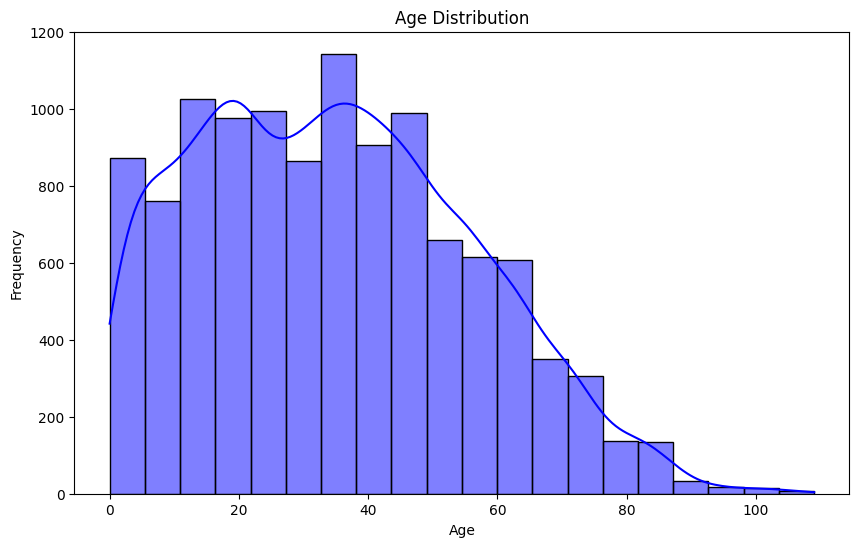

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(census_data['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Affluence Analysis

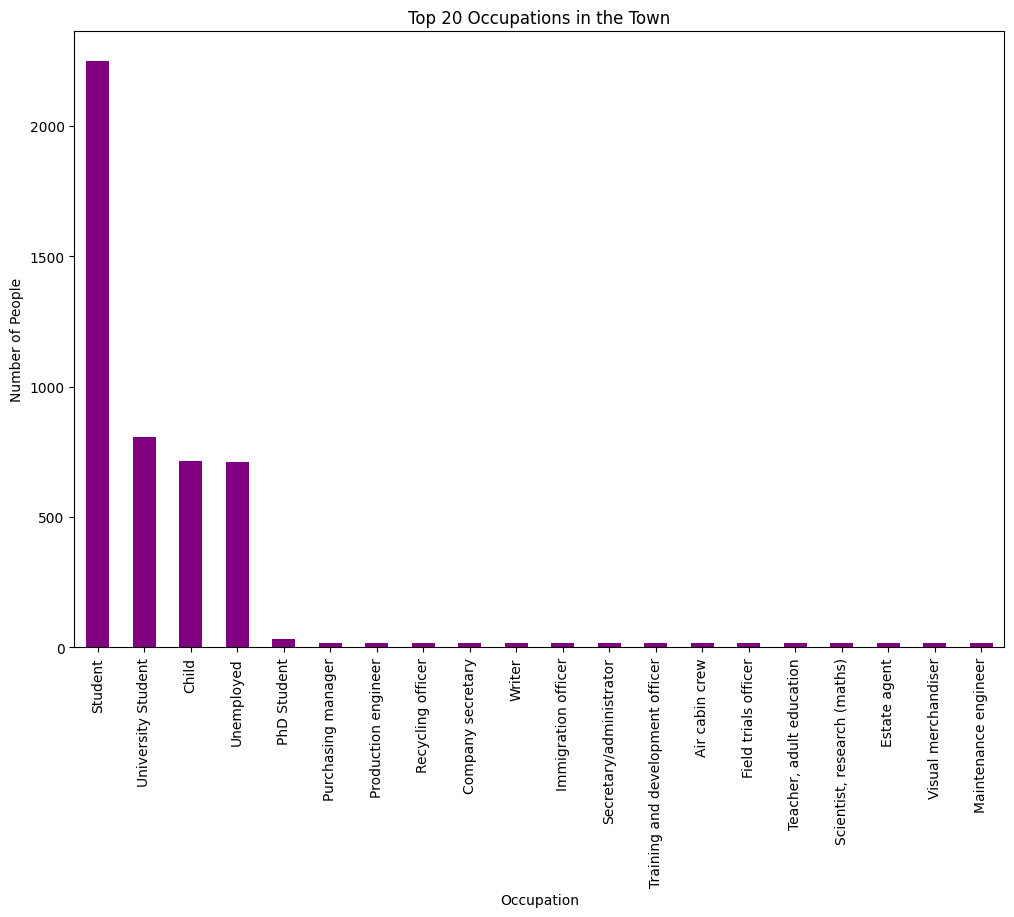

In [32]:
plt.figure(figsize=(12, 8))
census_data['Occupation'].value_counts().head(20).plot(kind='bar', color='purple')
plt.title('Top 20 Occupations in the Town')
plt.xlabel('Occupation')
plt.ylabel('Number of People')
plt.show()

### Religious Analysis

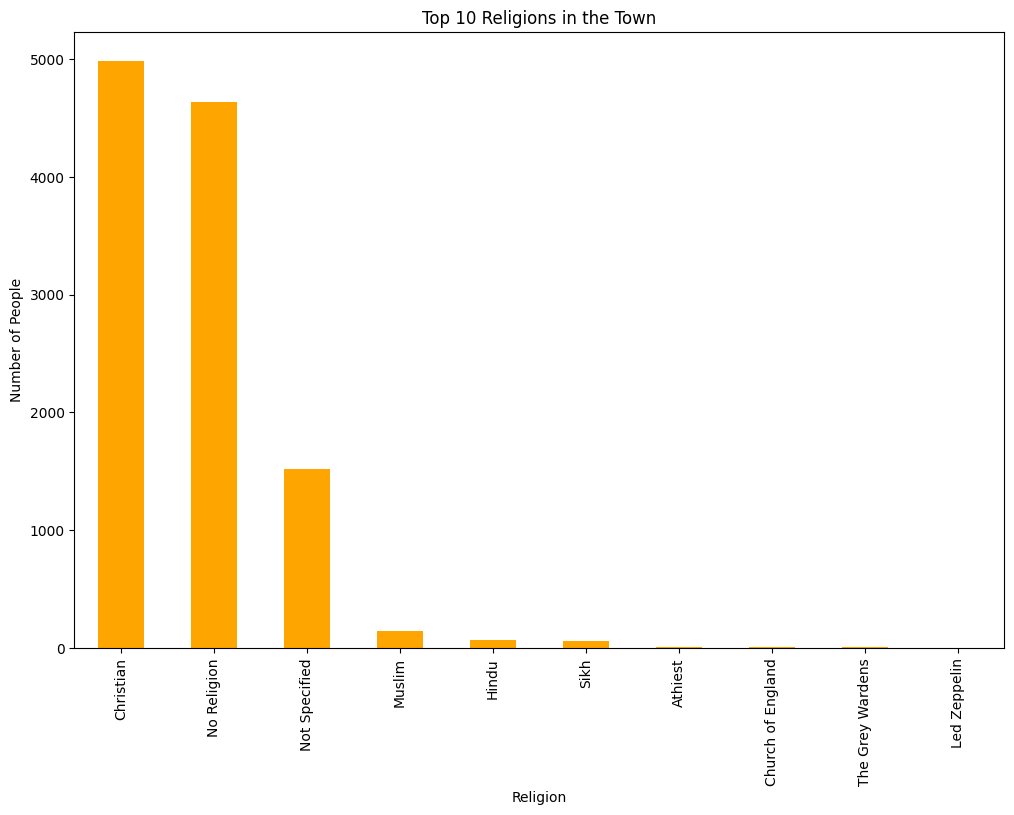

In [33]:
plt.figure(figsize=(12, 8))
census_data['Religion'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Religions in the Town')
plt.xlabel('Religion')
plt.ylabel('Number of People')
plt.show()

### Infirmity Analysis

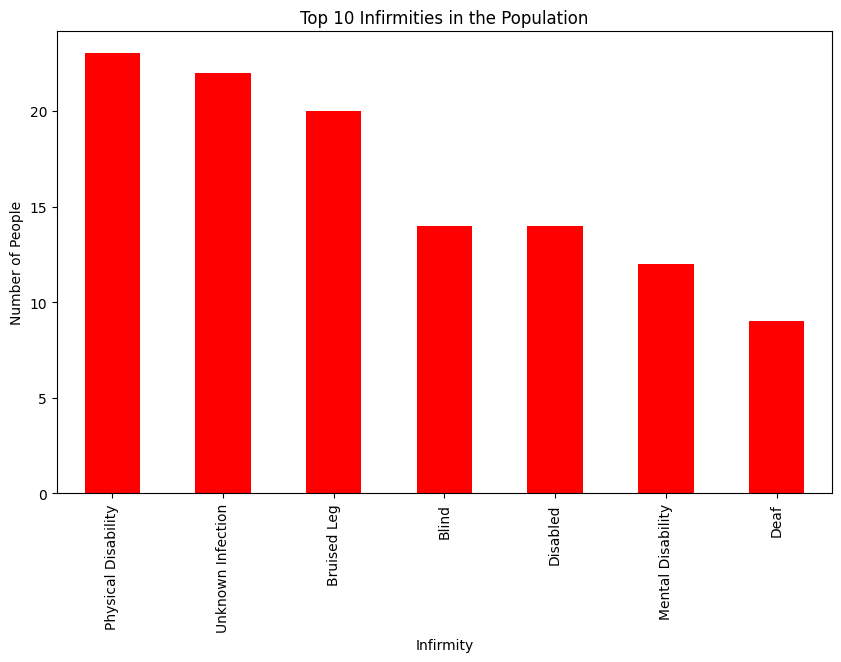

In [34]:
plt.figure(figsize=(10, 6))
census_data['Infirmity'].value_counts().head(10).plot(kind='bar', color='red')
plt.title('Top 10 Infirmities in the Population')
plt.xlabel('Infirmity')
plt.ylabel('Number of People')
plt.show()

### Commuter Analysis

In [35]:
commuter_keywords = ['student', 'engineer', 'commuter', 'driver']
census_data['Is Commuter'] = census_data['Occupation'].str.contains('|'.join(commuter_keywords), case=False, na=False)

#### Proportion of commuters vs non-commuters

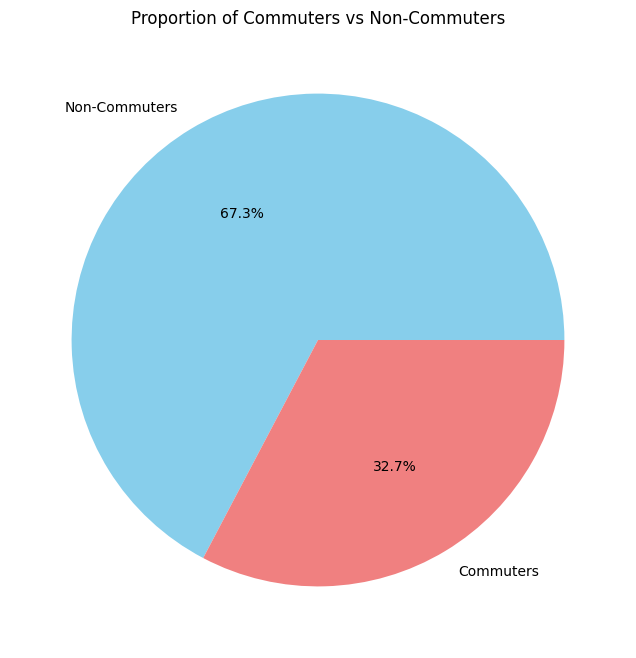

In [36]:
commuter_counts = census_data['Is Commuter'].value_counts()
plt.figure(figsize=(8, 8))
commuter_counts.plot(kind='pie', labels=['Non-Commuters', 'Commuters'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Commuters vs Non-Commuters')
plt.ylabel('')
plt.show()

#### Age distribution: commuters vs non-commuters

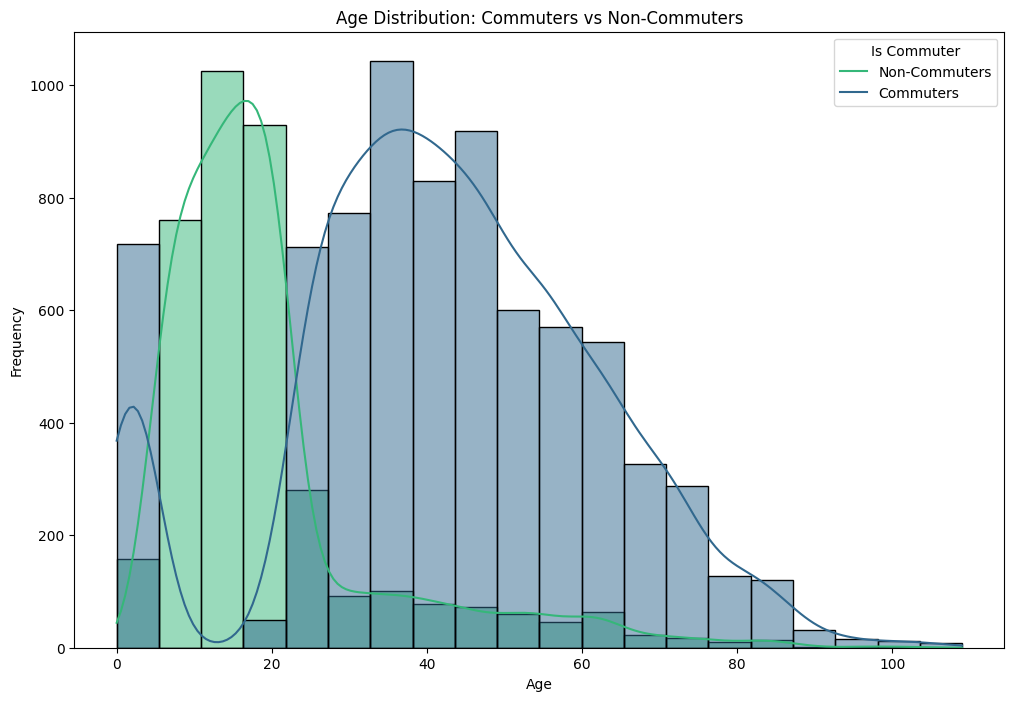

In [37]:
plt.figure(figsize=(12, 8))
sns.histplot(data=census_data, x='Age', hue='Is Commuter', kde=True, palette='viridis', bins=20)
plt.title('Age Distribution: Commuters vs Non-Commuters')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Is Commuter', labels=['Non-Commuters', 'Commuters'])
plt.show()

#### Top occupations among commuters

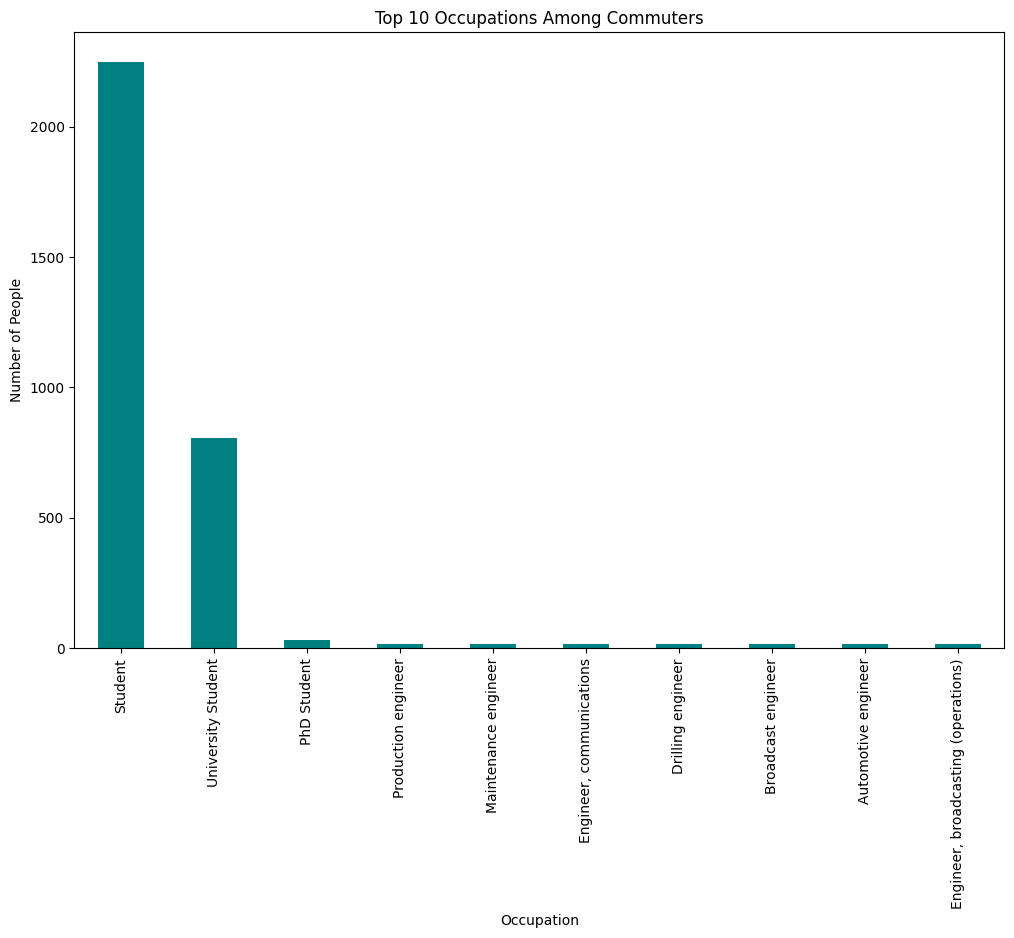

In [38]:
commuter_occupations = census_data[census_data['Is Commuter']]['Occupation'].value_counts().head(10)
plt.figure(figsize=(12, 8))
commuter_occupations.plot(kind='bar', color='teal')
plt.title('Top 10 Occupations Among Commuters')
plt.xlabel('Occupation')
plt.ylabel('Number of People')
plt.show()

___

### Unemployment Trends

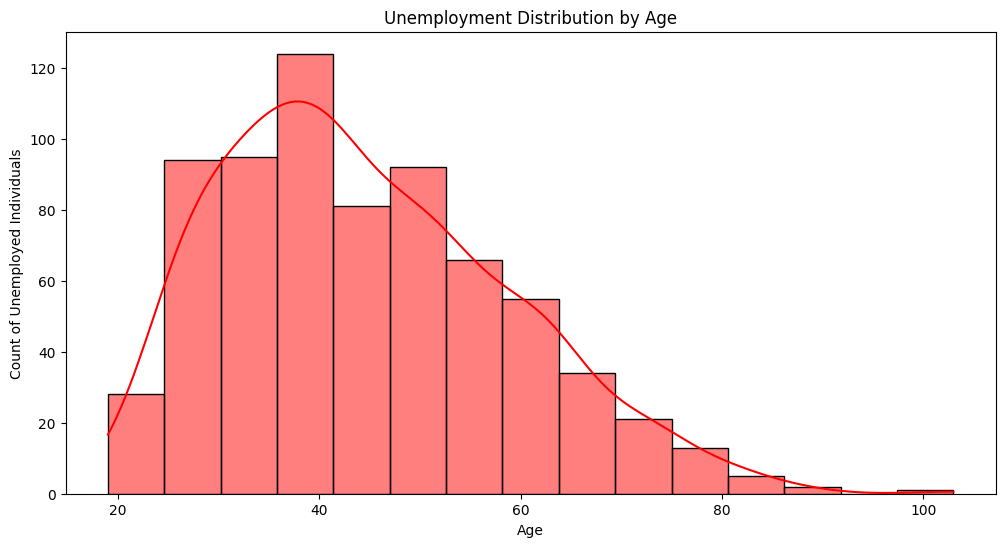

In [39]:
unemployment_data = census_data[census_data['Occupation'] == 'Unemployed']

plt.figure(figsize=(12, 6))
sns.histplot(unemployment_data['Age'], bins=15, kde=True, color='red')
plt.title('Unemployment Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count of Unemployed Individuals')
plt.show()


### Marriage and Divorce Rates

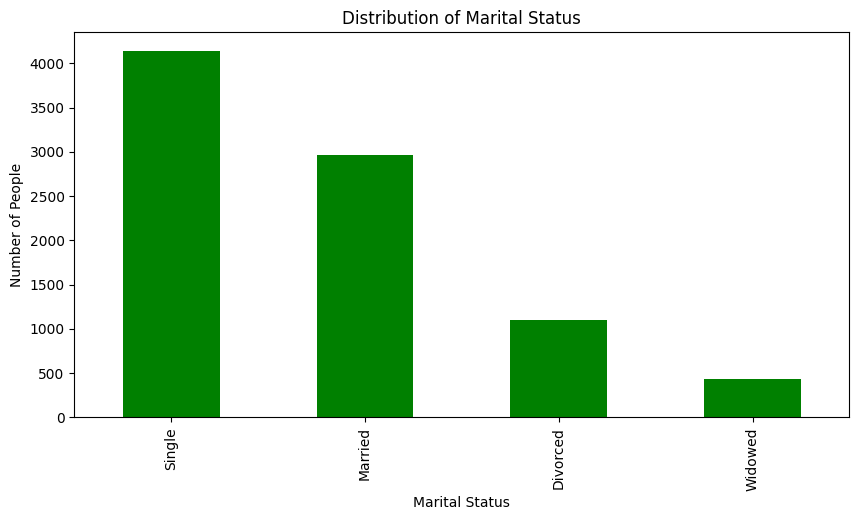

In [40]:
marital_status_counts = census_data['Marital Status'].value_counts()

plt.figure(figsize=(10, 5))
marital_status_counts.plot(kind='bar', color='green')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of People')
plt.show()

### Occupancy Levels (Average People per Household)

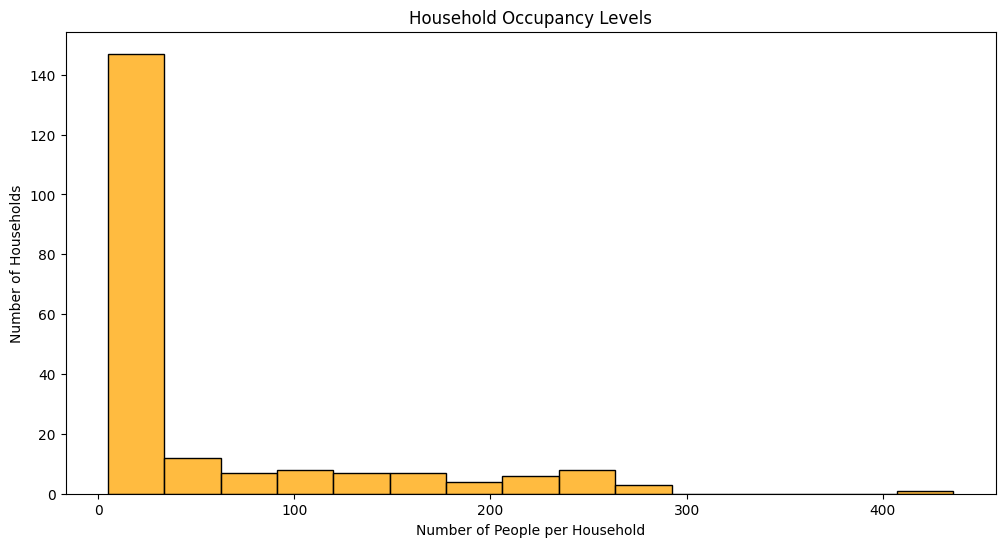

In [43]:
household_occupancy = census_data.groupby('House Number').size()

plt.figure(figsize=(12, 6))
sns.histplot(household_occupancy, bins=15, color='orange')
plt.title('Household Occupancy Levels')
plt.xlabel('Number of People per Household')
plt.ylabel('Number of Households')
plt.show()

___